In [23]:
import numpy as np
import pandas as pd

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
%matplotlib inline

In [26]:
df=pd.read_csv('911.csv',nrows=331761)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331761 entries, 0 to 331760
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        331761 non-null  float64
 1   lng        331761 non-null  float64
 2   desc       331761 non-null  object 
 3   zip        291543 non-null  float64
 4   title      331761 non-null  object 
 5   timeStamp  331761 non-null  object 
 6   twp        331644 non-null  object 
 7   addr       331761 non-null  object 
 8   e          331761 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 22.8+ MB


In [28]:
df.head()



,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


what are the top 5 zipcodes for 911 calls?

In [29]:
df['zip'].value_counts().head(5)

zip
19401.0    22488
19464.0    21911
19403.0    16786
19446.0    16058
19406.0    10991
Name: count, dtype: int64

**top 5 townships(twp) for 911 calls.**

In [30]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    28520
ABINGTON        20533
NORRISTOWN      18715
UPPER MERION    17587
CHELTENHAM      15254
Name: count, dtype: int64

**unique titles in title column.**

In [31]:
df['title'].nunique()

133

**create a new column for reason ,that contains reason(EMS,Fire) from title colums**

In [32]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])


In [33]:
df['Reason'].head(10)

0        EMS
1        EMS
2       Fire
3        EMS
4        EMS
5        EMS
6        EMS
7        EMS
8        EMS
9    Traffic
Name: Reason, dtype: object

**what is the most common reason for 911 call based on new column**

In [34]:
df['Reason'].value_counts().head(1)

Reason
EMS    164213
Name: count, dtype: int64

**create a countplot of 911 calls by reason**

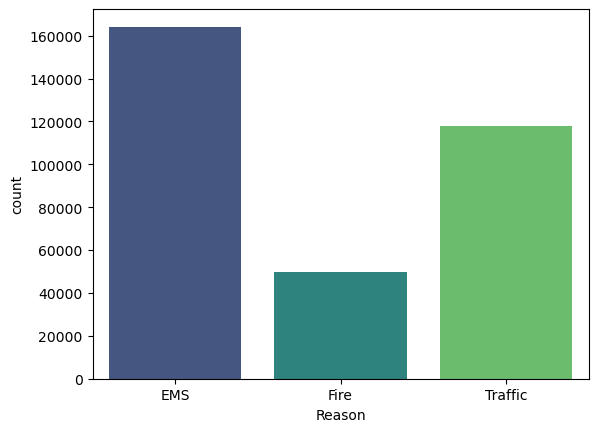

In [54]:
sns.countplot(x='Reason', data=df, palette='viridis', hue='Reason')
plt.show()

**dataType of objects in timeStamp column**

In [38]:
type(df['timeStamp'].iloc[0])

str

**timeStamp objects are in string form convert them into DateTime objects**

In [39]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [40]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp


**you can grab specific datetime object by calling them ,make 3 new columns** 

**called Hour, Month, Day**

In [41]:
Time=df['timeStamp'].iloc[0]

Time.month

12

In [42]:
df['hour']=df['timeStamp'].apply(lambda time: time.hour)
df['Month']=df['timeStamp'].apply(lambda time: time.month)
df['Day']=df['timeStamp'].apply(lambda time: time.day_of_week)

In [43]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


**Day is an integer , convert day into actual string name using this dictionary**
**dmap={0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}**

In [44]:
dmap={0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}

df['Day']=df['Day'].map(dmap)

In [45]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,thu


**create countplot of Day column with hue of Reason column**

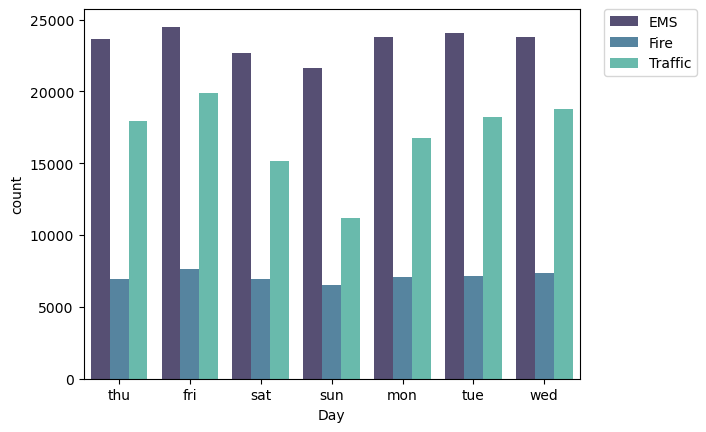

In [55]:
sns.countplot(x='Day',data=df,hue='Reason',alpha=0.9,palette='mako',legend=True)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.0)
plt.show()

**do same for month**


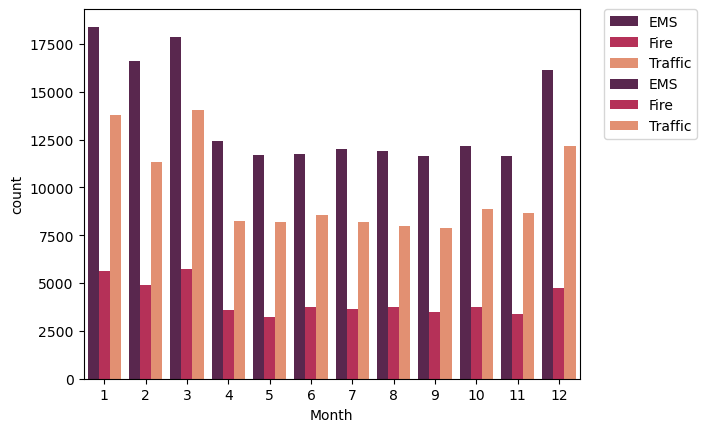

In [57]:
sns.countplot(x='Month',data=df,hue='Reason',alpha=1,palette='rocket')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.0)
plt.show()

**now create a groupby object called bymonth, where you group the dataframe by month column and use count() for aggreagation**

In [58]:
bymonth=df.groupby('Month').count()

In [59]:
bymonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Day
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,24274,24274,24274,21388,24274,24274,24266,24274,24274,24274,24274,24274
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093
6,24065,24065,24065,21070,24065,24065,24058,24065,24065,24065,24065,24065
7,23856,23856,23856,20940,23856,23856,23850,23856,23856,23856,23856,23856
8,23657,23657,23657,20739,23657,23657,23646,23657,23657,23657,23657,23657
9,23001,23001,23001,20014,23001,23001,22993,23001,23001,23001,23001,23001


**create a simple plot indicating the count of calls per month**

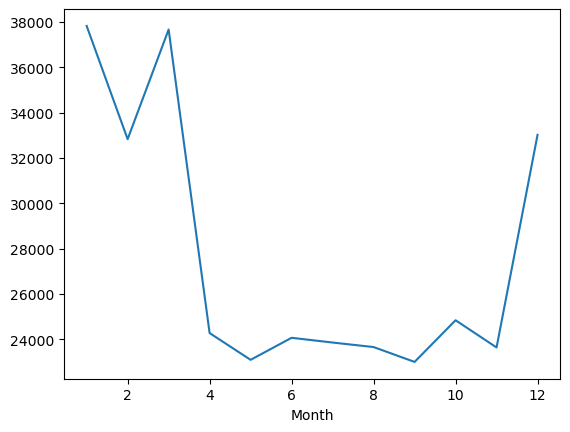

In [65]:
bymonth['lat'].plot() 
plt.show()

**create lmplot() to create linear fit on the number of calls per month,you may need to reset the index to a column.**

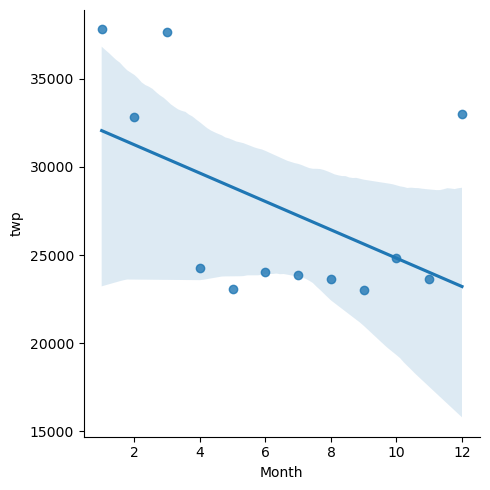

In [66]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())
plt.show()

**create a new column called date that contains date object from timeStamp column**

In [67]:
df['Date']=df['timeStamp'].apply(lambda date:date.date())

In [68]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
331756    2018-04-06
331757    2018-04-06
331758    2018-04-06
331759    2018-04-06
331760    2018-04-06
Name: Date, Length: 331761, dtype: object

**goupby the Date column with count() aggregate and create a plot of 911 calls**

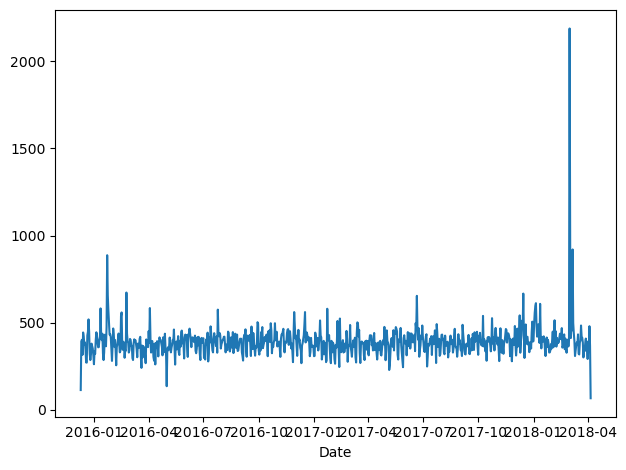

In [69]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.show()

**create 3 plots for each Reason in Reason column**

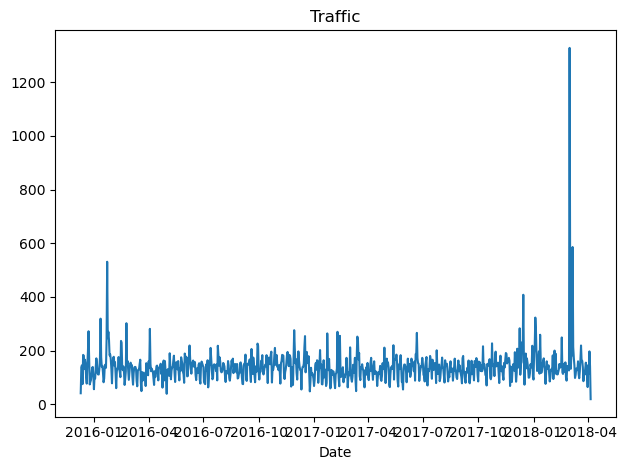

In [70]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()
plt.show()

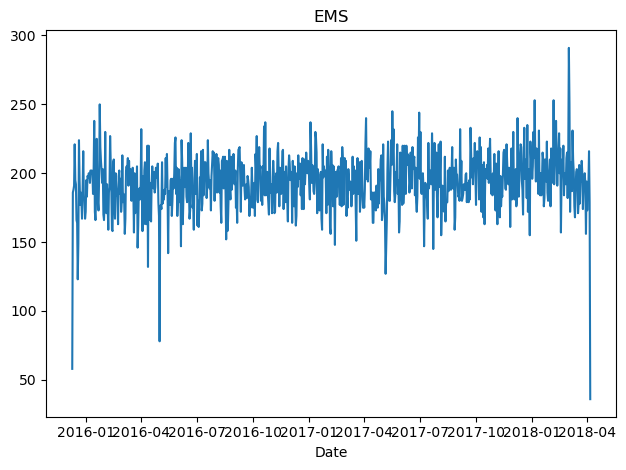

In [71]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()
plt.show()

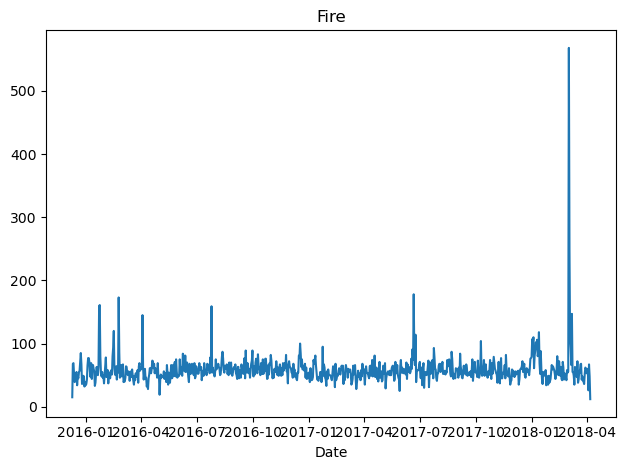

In [72]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()
plt.show()

  **create heatmap**
  **1st convert dataframe into matrix form,to do this**
  

**we will first do grouping by multiple columns,creating the multilevel index**
**then use unstack() to make one level as column and other as index**

In [73]:
df.groupby(by=['Day','hour']).count()['Reason'].unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
fri,907,802,717,656,640,798,1305,2115,2506,2587,...,3322,3583,3751,3613,2866,2572,2220,1923,1773,1419
mon,939,747,671,593,691,877,1332,2217,2765,2806,...,2777,3079,3122,3156,2770,2201,1941,1527,1326,1016
sat,1157,1012,924,781,755,797,964,1317,1704,2183,...,2705,2642,2612,2592,2522,2384,2121,1885,1613,1499
sun,1176,1050,977,820,736,749,904,1229,1532,1901,...,2348,2215,2253,2293,2222,2113,1790,1566,1254,1188
thu,885,698,735,608,583,843,1404,2280,2653,2757,...,2912,3122,3059,3405,2746,2261,2001,1756,1379,1141
tue,857,710,635,607,647,872,1408,2291,2887,2783,...,2985,3191,3375,3341,2964,2316,1989,1680,1354,1039
wed,818,748,635,630,568,805,1408,2354,2806,2793,...,3154,3291,3494,3507,2837,2336,2096,1711,1441,1119


In [74]:
dayhour=df.groupby(by=['Day','hour']).count()['Reason'].unstack()

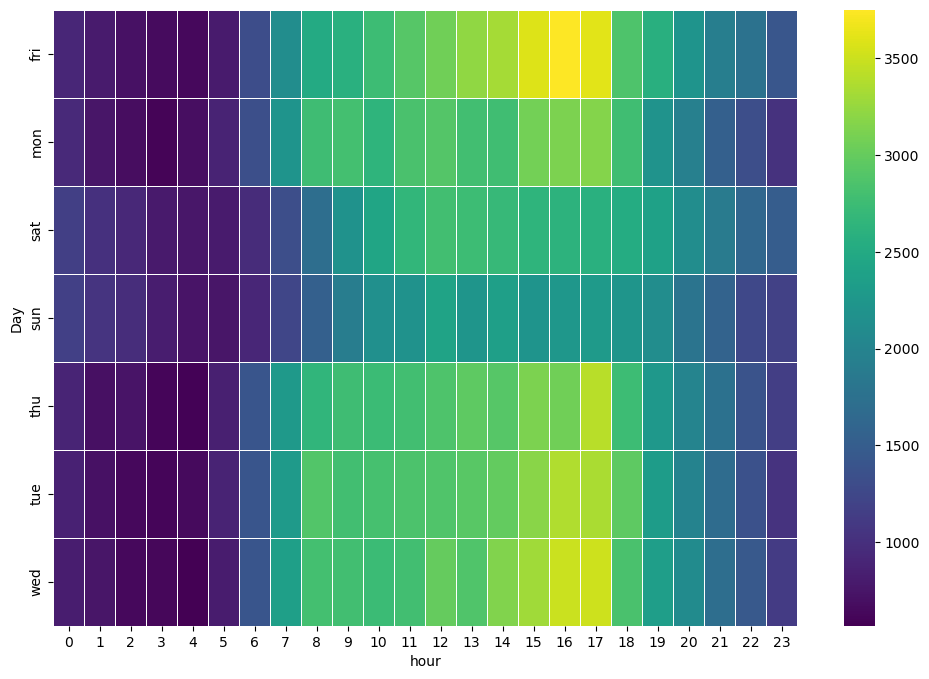

In [77]:
#heatmap
plt.figure(figsize=(12,8))
sns.heatmap(dayhour,cmap='viridis',linewidth=0.5)
plt.show()

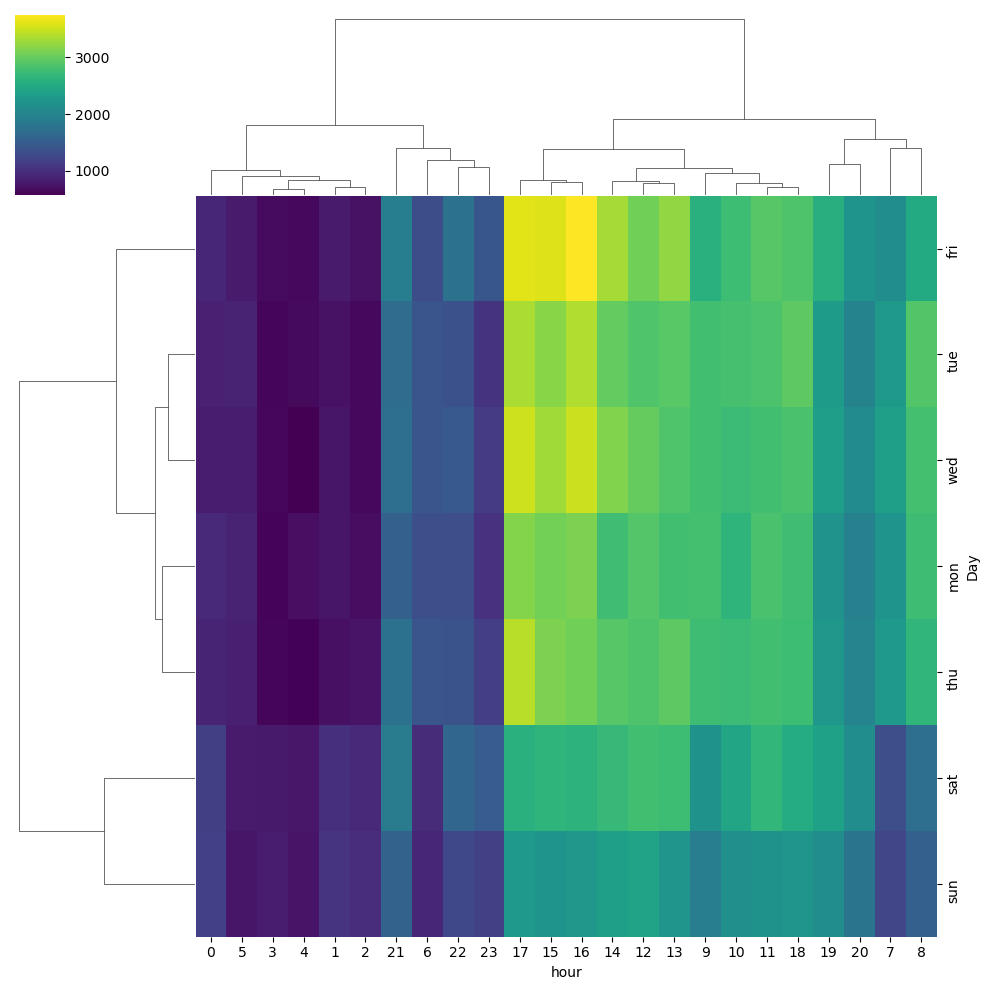

In [78]:
#clustermap

sns.clustermap(dayhour,cmap='viridis')
plt.show()

**do the same for month as a column**

In [79]:
df.groupby(by=['Month','hour']).count()['Reason'].unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
1,799,651,654,592,597,697,1163,1646,2155,2136,...,2182,2184,2150,2426,2212,1833,1536,1343,1133,942
2,710,617,515,449,497,592,956,1525,1726,1772,...,1911,2013,1965,1952,1953,1639,1471,1207,1065,901
3,743,645,621,498,477,621,948,1526,1901,2022,...,2480,2637,2614,2419,1999,1815,1628,1320,1093,900
4,498,404,365,342,368,399,704,1046,1269,1249,...,1535,1589,1683,1558,1382,1105,1053,836,721,595
5,485,366,350,312,298,370,586,981,1200,1290,...,1380,1487,1566,1552,1209,1059,1027,889,771,530
6,442,390,363,291,266,412,591,922,1159,1248,...,1498,1578,1772,1620,1386,1170,1033,912,783,656
7,491,453,377,367,348,412,522,836,1092,1268,...,1499,1404,1599,1617,1383,1245,1075,959,773,615
8,495,415,422,372,341,435,529,928,1125,1162,...,1517,1567,1588,1467,1230,1109,1049,874,700,609
9,501,422,382,320,280,388,591,1069,1205,1314,...,1358,1415,1498,1475,1251,1141,993,861,693,571


In [80]:
monthhour=df.groupby(by=['Month','hour']).count()['Reason'].unstack()

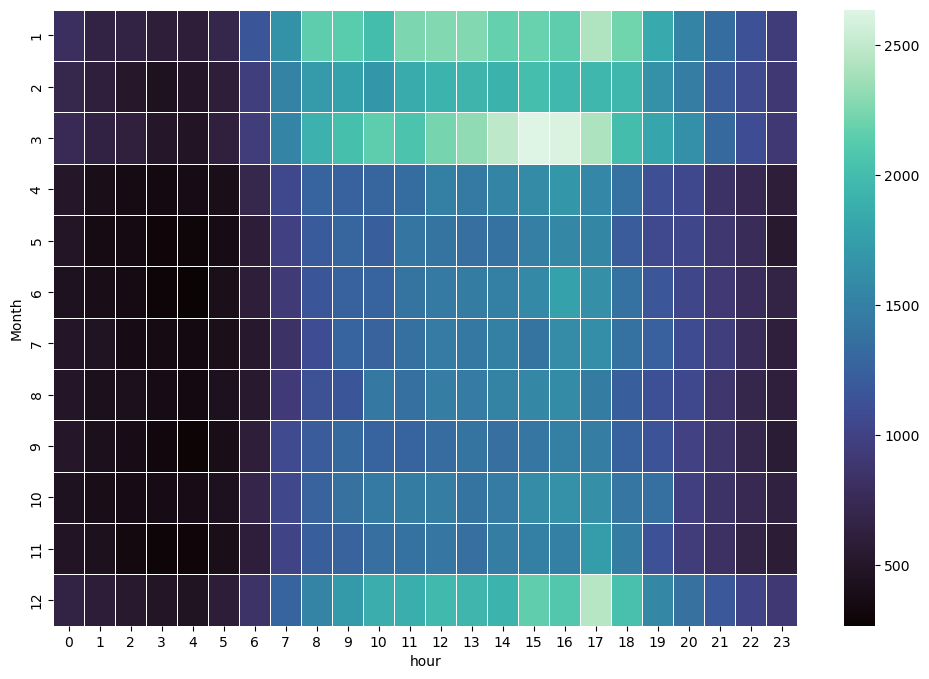

In [81]:
plt.figure(figsize=(12,8))
sns.heatmap(monthhour,cmap='mako',linewidth=0.5)
plt.show()

<Figure size 1200x800 with 0 Axes>

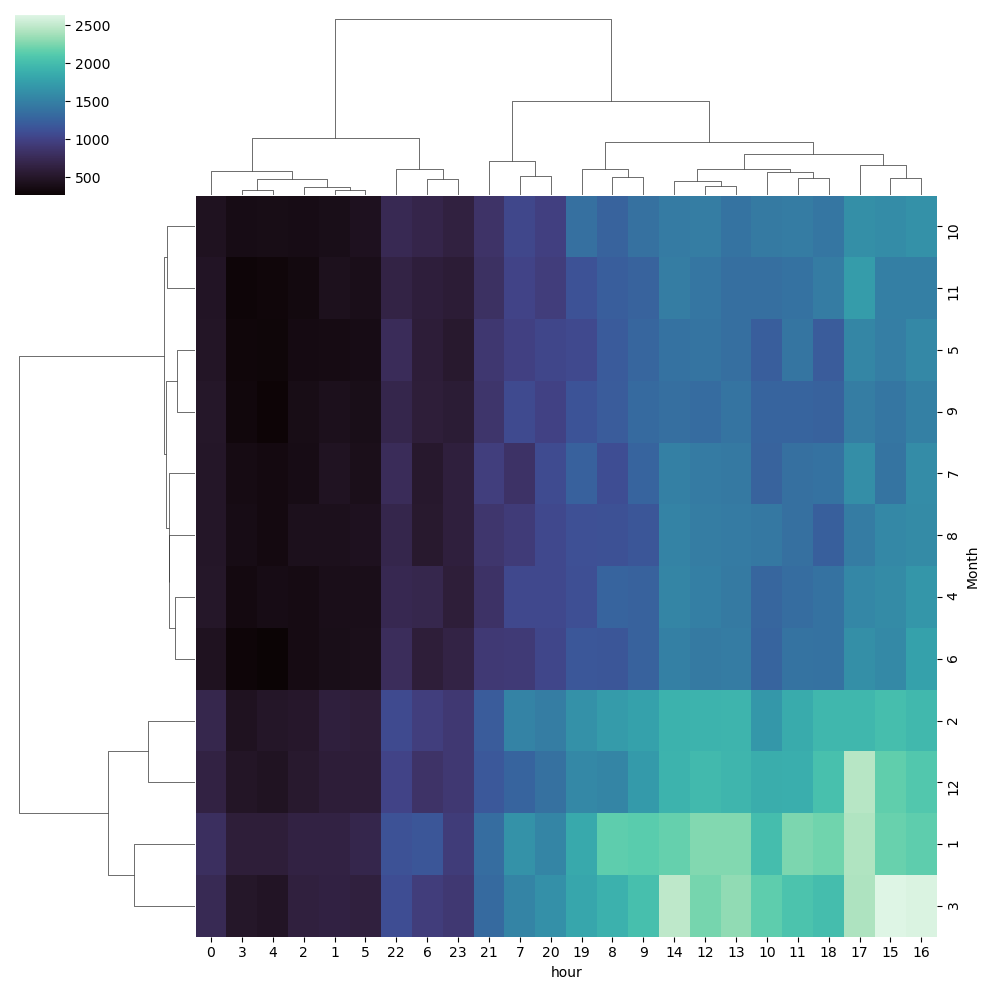

In [82]:
plt.figure(figsize=(12,8))
sns.clustermap(monthhour,cmap='mako')
plt.show()

In [83]:
daymonth=df.groupby(by=['Day','Month']).count()['Reason'].unstack()

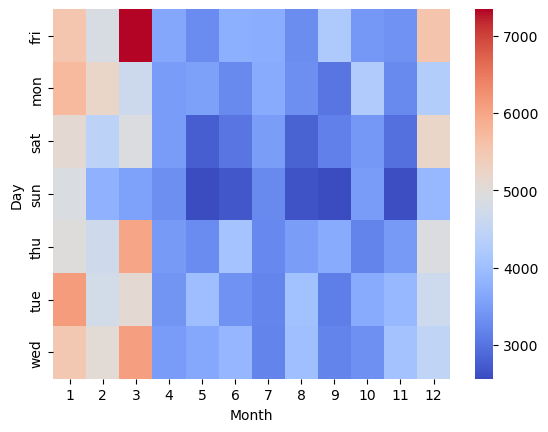

In [84]:
sns.heatmap(daymonth,cmap='coolwarm')
plt.show()

<Figure size 1200x800 with 0 Axes>

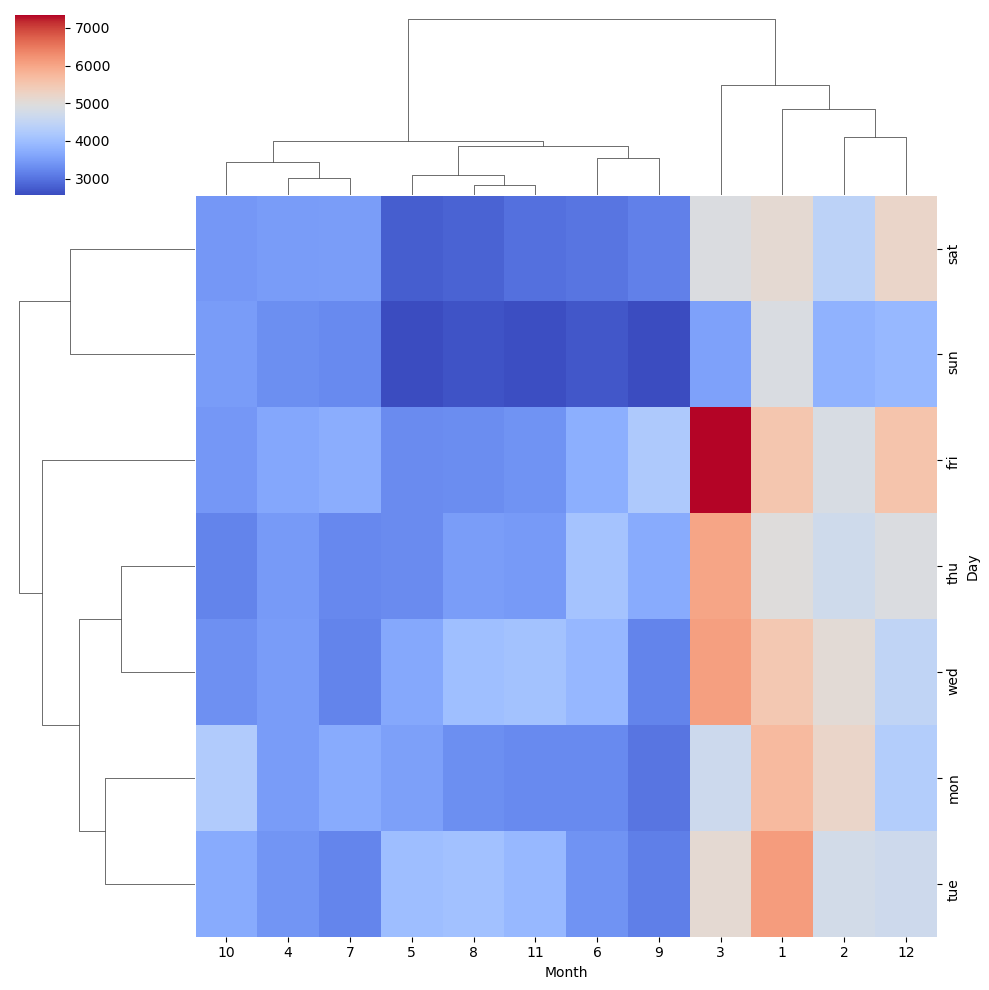

In [87]:
plt.figure(figsize=(12,8))
sns.clustermap(daymonth,cmap='coolwarm')
plt.show()